In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  import lasio
except:
  %pip install lasio
  import lasio

                                              0.0/47.4 kB ? eta -:--:--
     --------                                 10.2/47.4 kB ? eta -:--:--
     ----------------                       20.5/47.4 kB 162.5 kB/s eta 0:00:01
     --------------------------------       41.0/47.4 kB 279.3 kB/s eta 0:00:01
     -------------------------------------- 47.4/47.4 kB 216.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
las = lasio.read('data/gorgonichthys_1_wire_gold.las',engine='normal')

In [3]:
las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="YES", descr="Multiple lines per de")]

In [4]:
las.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="", original_mnemonic="DEPTH", data.shape=(30015,)),
 CurveItem(mnemonic="AI", unit="GF/C3S", value="", descr="Acoustic impedence", original_mnemonic="AI", data.shape=(30015,)),
 CurveItem(mnemonic="BADHOLE", unit="", value="", descr="0", original_mnemonic="BADHOLE", data.shape=(30015,)),
 CurveItem(mnemonic="BMOD", unit="6PSI", value="", descr="Bulk modulus", original_mnemonic="BMOD", data.shape=(30015,)),
 CurveItem(mnemonic="CAL", unit="IN", value="00001000", descr="", original_mnemonic="CAL", data.shape=(30015,)),
 CurveItem(mnemonic="COAL", unit="", value="", descr="0", original_mnemonic="COAL", data.shape=(30015,)),
 CurveItem(mnemonic="DRHO_GOLD", unit="G/C3", value="00001000", descr="", original_mnemonic="DRHO_GOLD", data.shape=(30015,)),
 CurveItem(mnemonic="DTC_GOLD", unit="US/F", value="00001000", descr="", original_mnemonic="DTC_GOLD", data.shape=(30015,)),
 CurveItem(mnemonic="DTC_PRED", unit="US/F", value="", descr="E

In [5]:
data = las.df()
data.reset_index(inplace=True)
data.head()

,DEPTH,AI,BADHOLE,BMOD,CAL,COAL,DRHO_GOLD,DTC_GOLD,DTC_PRED,DTS_GOLD,...,SI,SMOD,SWT,SXOT,VOL_WETCLAY,VP,VPVS,VS,YMD,YMOD
0,196.90079,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.8546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197.05319,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.6582,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197.20559,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.4047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197.35799,NaN,0.0,NaN,NaN,0.0,NaN,NaN,76.8988,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197.51039,NaN,0.0,NaN,NaN,0.0,NaN,NaN,75.9863,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Percentage of data missing
data.isnull().sum() / data.shape[0] * 100

DEPTH                0.000000
AI                  48.912211
BADHOLE              0.000000
BMOD                48.912211
CAL                 48.565717
COAL                 0.000000
DRHO_GOLD           48.745627
DTC_GOLD            46.320173
DTC_PRED             0.676329
DTS_GOLD            46.473430
DTS_PRED             0.676329
GR_GOLD              0.676329
K                   48.912211
KINT                81.855739
LAMRH               48.912211
MURH                48.912211
NETSAND             81.632517
NPHI_GOLD           81.555889
PAY                 81.632517
PEF                 48.682326
PHIE                81.632517
PHIT                81.632517
PR                  48.912211
RES_DEEP_GOLD       48.245877
RES_SHALLOW_GOLD    48.255872
RHOB_GOLD           48.912211
RHOB_PRED            0.676329
SI                  48.912211
SMOD                48.912211
SWT                 81.632517
SXOT                81.632517
VOL_WETCLAY         81.632517
VP                  46.320173
VPVS      

In [7]:
columns_needed = ['DEPTH','DT','DTS','GR','RHO','VP','VS','VPVS','IP','IS','VSH','RHOm','RHOf','PHIE']
data.columns

Index(['DEPTH', 'AI', 'BADHOLE', 'BMOD', 'CAL', 'COAL', 'DRHO_GOLD',
       'DTC_GOLD', 'DTC_PRED', 'DTS_GOLD', 'DTS_PRED', 'GR_GOLD', 'K', 'KINT',
       'LAMRH', 'MURH', 'NETSAND', 'NPHI_GOLD', 'PAY', 'PEF', 'PHIE', 'PHIT',
       'PR', 'RES_DEEP_GOLD', 'RES_SHALLOW_GOLD', 'RHOB_GOLD', 'RHOB_PRED',
       'SI', 'SMOD', 'SWT', 'SXOT', 'VOL_WETCLAY', 'VP', 'VPVS', 'VS', 'YMD',
       'YMOD'],
      dtype='object')

In [9]:
L = data[['DEPTH','DTC_GOLD','DTS_GOLD','GR_GOLD','RHOB_GOLD','VP','VS','VPVS','AI','SI','VOL_WETCLAY','PHIE']]
L.loc[:,'RHOm'] = 2.65
L.loc[:,'RHOf'] = 1
L = L.dropna()
DEPTH_MIN = 3928.3
DEPTH_MAX = 4090.5
L = L[(L['DEPTH']>DEPTH_MIN) & (L['DEPTH']<DEPTH_MAX)]
L.head()

C:\Users\sahur\AppData\Local\Temp\ipykernel_11572\1517285610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L.loc[:,'RHOm'] = 2.65
C:\Users\sahur\AppData\Local\Temp\ipykernel_11572\1517285610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L.loc[:,'RHOf'] = 1


,DEPTH,DTC_GOLD,DTS_GOLD,GR_GOLD,RHOB_GOLD,VP,VS,VPVS,AI,SI,VOL_WETCLAY,PHIE,RHOm,RHOf
24485,3928.41373,75.0295,127.905,90.7562,2.6661,13328.0908,7818.3027,1.7047,35533.9219,20844.3184,0.575355,0.001001,2.65,1
24486,3928.56613,74.5634,128.394,95.7989,2.6673,13411.4053,7788.5259,1.7219,35771.8203,20774.0898,0.562940,0.001001,2.65,1
24487,3928.71853,74.2541,128.675,100.0100,2.6684,13467.2705,7771.5171,1.7329,35936.6641,20737.8613,0.582759,0.001001,2.65,1
24488,3928.87093,73.6112,128.530,106.8610,2.6696,13584.8896,7780.2847,1.7461,36266.4961,20770.4062,0.589147,0.001001,2.65,1
24489,3929.02333,72.8832,128.140,112.0420,2.6708,13720.5830,7803.9644,1.7582,36644.8828,20842.8008,0.586680,0.001001,2.65,1


In [10]:
# Names needed: ['DEPTH','DT','DTS','GR','RHO','VP','VS','VPVS','IP','IS','VSH','RHOm','RHOf','PHIE']
col_rename = {
    'DEPTH':'DEPTH',
    'DTC_GOLD':'DT',
    'DTS_GOLD':'DTS',
    'GR_GOLD':'GR',
    'RHOB_GOLD':'RHO',
    'VP':'VP',
    'VS':'VS',
    'VPVS':'VPVS',
    'AI':'IP',
    'SI':'IS',
    'VOL_WETCLAY':'VSH',
    'PHIE':'PHIE'
}
L.rename(columns = col_rename,inplace = True)
L.columns

Index(['DEPTH', 'DT', 'DTS', 'GR', 'RHO', 'VP', 'VS', 'VPVS', 'IP', 'IS',
       'VSH', 'PHIE', 'RHOm', 'RHOf'],
      dtype='object')

In [11]:
# Percentage of data missing
L.isnull().sum() / L.shape[0] * 100

DEPTH    0.0
DT       0.0
DTS      0.0
GR       0.0
RHO      0.0
VP       0.0
VS       0.0
VPVS     0.0
IP       0.0
IS       0.0
VSH      0.0
PHIE     0.0
RHOm     0.0
RHOf     0.0
dtype: float64

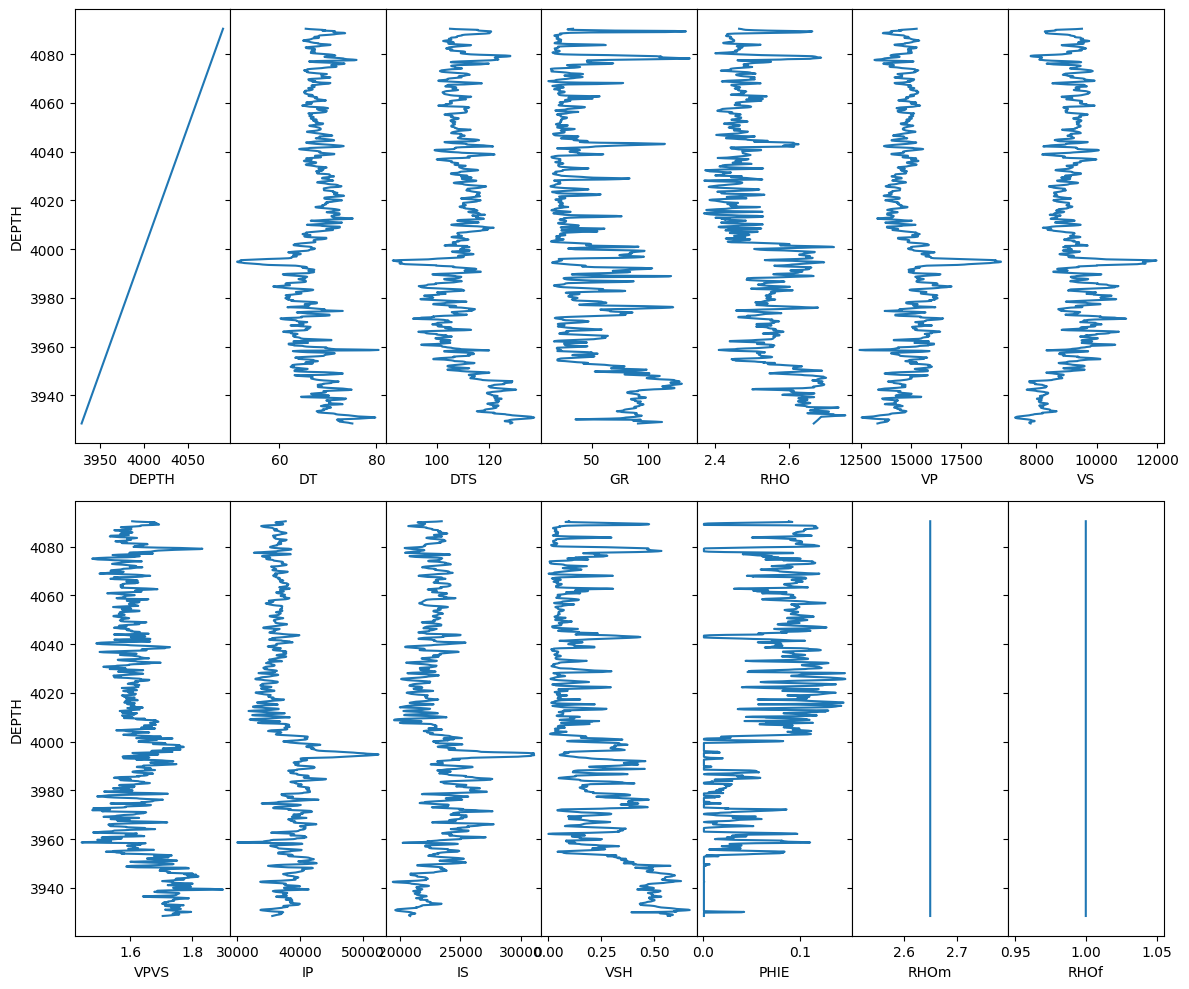

In [12]:
fig, axes = plt.subplots(2, 7, figsize=(12, 10), sharey=True, gridspec_kw={'wspace': 0})
for i, column in enumerate(L.columns):
    row = i // 7
    col = i % 7
    axes[row, col].plot(L[column], L['DEPTH'])
    axes[row, col].set_xlabel(column)
    if col == 0:
        axes[row, col].set_ylabel('DEPTH')
plt.tight_layout()
plt.show()

In [13]:
# define basic styles for plotting log curves (sty0), sand (sty1) and shale (sty2)
sty0 = {'lw':1, 'color':'k', 'ls':'-'}
sty1 = {'marker':'o', 'color':'g', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}
sty2 = {'marker':'o', 'color':'r', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}

def plotlog(L, cutoff_sand, cutoff_shale):
    # define filters to select sand (ss) and shale (sh)
    ss =  (L.VSH<=cutoff_sand)
    sh =  (L.VSH>=cutoff_shale)

    # plot figure
    f = plt.subplots(figsize=(14, 6))
    ax0 = plt.subplot2grid((1,9), (0,0), colspan=1) # gr curve
    ax1 = plt.subplot2grid((1,9), (0,1), colspan=1) # ip curve
    ax2 = plt.subplot2grid((1,9), (0,2), colspan=1) # vp/vs curve
    ax3 = plt.subplot2grid((1,9), (0,3), colspan=3) # crossplot phi - vp
    ax4 = plt.subplot2grid((1,9), (0,6), colspan=3) # crossplot ip - vp/vs

    ax0.plot(L.VSH[ss], L.index[ss], **sty1)
    ax0.plot(L.VSH[sh], L.index[sh], **sty2)
    ax0.plot(L.VSH, L.index, **sty0)
    ax0.set_xlabel('VSH')
    ax0.locator_params(axis='x', nbins=2)

    ax1.plot(L.IP[ss], L.index[ss], **sty1)
    ax1.plot(L.IP[sh], L.index[sh], **sty2)
    ax1.plot(L.IP, L.index,  **sty0)
    ax1.set_xlabel('$I_\mathrm{P}$')
    ax1.locator_params(axis='x', nbins=2)

    ax2.plot(L.VPVS[ss], L.index[ss], **sty1)
    ax2.plot(L.VPVS[sh], L.index[sh], **sty2)
    ax2.plot(L.VPVS, L.index, **sty0)
    ax2.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$')
    ax2.locator_params(axis='x', nbins=2)

    ax3.plot(L.PHIE[ss], L.VP[ss], **sty1)
    ax3.set_xlabel('$V_\mathrm{P}$ vs $\phi_\mathrm{e}$')

    ax4.plot(L.VP*L.RHO[ss], L.VP/L.VS[ss], **sty1)
    ax4.plot(L.VP*L.RHO[sh], L.VP/L.VS[sh], **sty2)
    ax4.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$ vs $I_\mathrm{P}$')

    for ax in [ax0, ax1, ax2]:
        if ax != ax0 and ax != ax1 and ax != ax2:
            ax.remove()
    for aa in [ax0,ax1,ax2,ax3,ax4]:
        aa.tick_params(which='major', labelsize=8)
    for aa in [ax1,ax2]:
        aa.set_yticklabels([])
    plt.subplots_adjust(wspace=.8,left=0.05,right=0.95)
    plt.show()

C:\Users\sahur\AppData\Local\Temp\ipykernel_11572\1040634880.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot2grid((1,9), (0,0), colspan=1) # gr curve


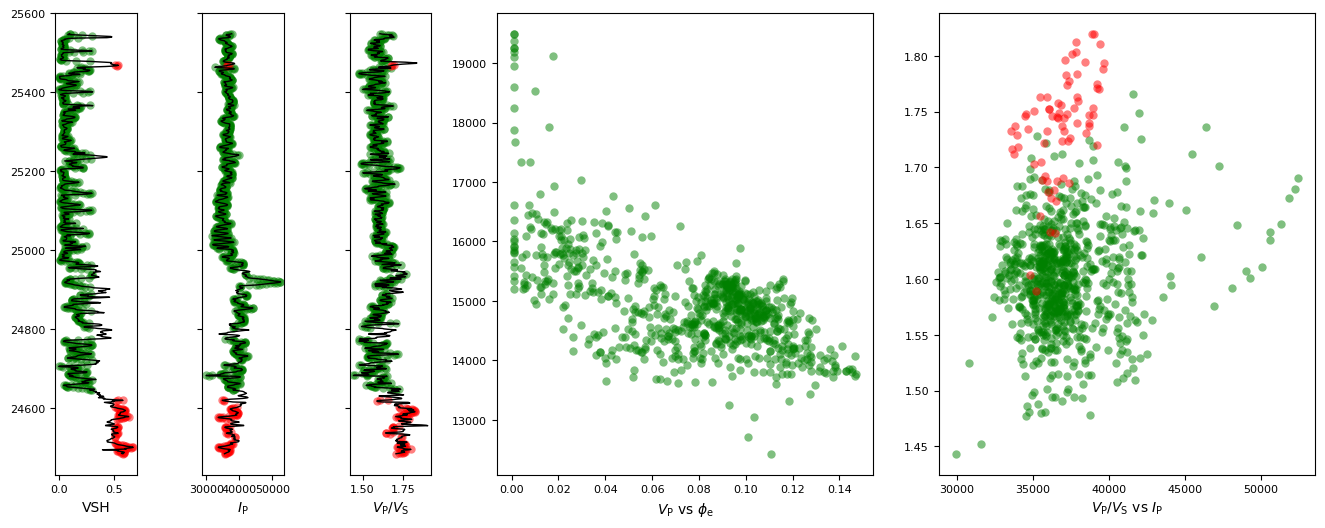

In [14]:
plotlog(L, 0.3, 0.5)

In [15]:
def vrh(f, M1, M2):
    '''
    Simple Voigt-Reuss-Hill bounds for 2-components mixture, (C) aadm 2017

    INPUT
    f: volumetric fraction of mineral 1
    M1: elastic modulus mineral 1
    M2: elastic modulus mineral 2

    OUTPUT
    M_Voigt: upper bound or Voigt average
    M_Reuss: lower bound or Reuss average
    M_VRH: Voigt-Reuss-Hill average
    '''
    M_Voigt = f*M1 + (1-f)*M2
    M_Reuss = 1/ ( f/M1 + (1-f)/M2 )
    M_VRH   = (M_Voigt+M_Reuss)/2
    return M_Voigt, M_Reuss, M_VRH

In [16]:
def vels(K_DRY, G_DRY, K0, D0, Kf, Df, phi):
    '''
    Calculates velocities and densities of saturated rock via Gassmann equation, (C) aadm 2015

    INPUT
    K_DRY,G_DRY: dry rock bulk & shear modulus in GPa
    K0, D0: mineral bulk modulus and density in GPa
    Kf, Df: fluid bulk modulus and density in GPa
    phi: porosity
    '''
    rho  = D0*(1-phi)+Df*phi
    K    = K_DRY + (1-K_DRY/K0)**2 / ( (phi/Kf) + ((1-phi)/K0) - (K_DRY/K0**2) )
    vp   = np.sqrt((K+4./3*G_DRY)/rho)*1e3
    vs   = np.sqrt(G_DRY/rho)*1e3
    return vp, vs, rho, K

In [17]:
def hertzmindlin(K0, G0, phi, phic=0.4, Cn=8.6, P=10, f=1):
    '''
    Hertz-Mindlin model
    written by aadm (2015) from Rock Physics Handbook, p.246

    INPUT
    K0, G0: mineral bulk & shear modulus in GPa
    phi: porosity
    phic: critical porosity (default 0.4)
    Cn: coordination nnumber (default 8.6)
    P: confining pressure in MPa (default 10)
    f: shear modulus correction factor
       1=dry pack with perfect adhesion
       0=dry frictionless pack
    '''
    P   /= 1e3 # converts pressure in same units as solid moduli (GPa)
    PR0  =(3*K0-2*G0)/(6*K0+2*G0) # poisson's ratio of mineral mixture
    K_HM = (P*(Cn**2*(1-phic)**2*G0**2) / (18*np.pi**2*(1-PR0)**2))**(1/3)
    G_HM = ((2+3*f-PR0*(1+3*f))/(5*(2-PR0))) * ((P*(3*Cn**2*(1-phic)**2*G0**2)/(2*np.pi**2*(1-PR0)**2)))**(1/3)
    return K_HM, G_HM

In [18]:
def softsand(K0, G0, phi, phic=0.4, Cn=8.6, P=10, f=1):
    '''
    Soft-sand (uncemented) model
    written by aadm (2015) from Rock Physics Handbook, p.258

    INPUT
    K0, G0: mineral bulk & shear modulus in GPa
    phi: porosity
    phic: critical porosity (default 0.4)
    Cn: coordination nnumber (default 8.6)
    P: confining pressure in MPa (default 10)
    f: shear modulus correction factor
       1=dry pack with perfect adhesion
       0=dry frictionless pack
    '''
    K_HM, G_HM = hertzmindlin(K0, G0, phi, phic, Cn, P, f)
    K_DRY =-4/3*G_HM + (((phi/phic)/(K_HM+4/3*G_HM)) + ((1-phi/phic)/(K0+4/3*G_HM)))**-1
    tmp   = G_HM/6*((9*K_HM+8*G_HM) / (K_HM+2*G_HM))
    G_DRY = -tmp + ((phi/phic)/(G_HM+tmp) + ((1-phi/phic)/(G0+tmp)))**-1
    return K_DRY, G_DRY

In [19]:
def stiffsand(K0, G0, phi, phic=0.4, Cn=8.6, P=10, f=1):
    '''
    Stiff-sand model
    written by aadm (2015) from Rock Physics Handbook, p.260

    INPUT
    K0, G0: mineral bulk & shear modulus in GPa
    phi: porosity
    phic: critical porosity (default 0.4)
    Cn: coordination nnumber (default 8.6)
    P: confining pressure in MPa (default 10)
    f: shear modulus correction factor
       1=dry pack with perfect adhesion
       0=dry frictionless pack
    '''
    K_HM, G_HM = hertzmindlin(K0, G0, phi, phic, Cn, P, f)
    K_DRY  = -4/3*G0 + (((phi/phic)/(K_HM+4/3*G0)) + ((1-phi/phic)/(K0+4/3*G0)))**-1
    tmp    = G0/6*((9*K0+8*G0) / (K0+2*G0))
    G_DRY  = -tmp + ((phi/phic)/(G_HM+tmp) + ((1-phi/phic)/(G0+tmp)))**-1
    return K_DRY, G_DRY

In [20]:
RHO_qz = 2.6;   K_qz = 37;  MU_qz = 44
RHO_sh = 2.8;   K_sh = 15;  MU_sh = 5
RHO_b = 1.1 ;   K_b = 2.8
RHO_o = 0.8;    K_o = 0.9
RHO_g = 0.2;    K_g = 0.06

Cn = 8
phic = 0.4
f = 1

phi=np.linspace(0.01, 0.14)

In [21]:
K0, MU0, RHO0 = K_qz, MU_qz, RHO_qz

Kdry, MUdry = softsand(K0, MU0, phi, phic, Cn, P=45)
vp_ssm, vs_ssm, rho_ssm, _ = vels(Kdry, MUdry, K0, RHO0, K_b, RHO_b, phi)

Kdry, MUdry = stiffsand(K0, MU0, phi, phic, Cn, P=45)
vp_sti, vs_sti, rho_sti, _ = vels(Kdry, MUdry, K0, RHO0, K_b, RHO_b, phi)

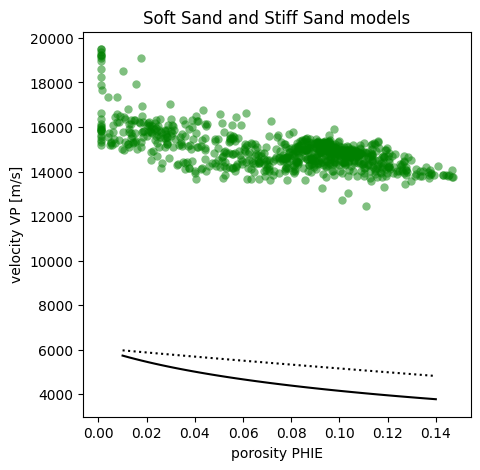

In [22]:
cutoff_sand, cutoff_shale = 0.3, 0.5

ss = (L.VSH <= cutoff_sand)
sh = (L.VSH >= cutoff_shale)

f, ax = plt.subplots(figsize=(5, 5))
ax.plot(L.PHIE[ss], L.VP[ss], **sty1)
ax.plot(phi, vp_ssm, '-k')
ax.plot(phi, vp_sti, ':k')
ax.set_xlabel('porosity PHIE')
ax.set_ylabel('velocity VP [m/s]')
ax.set_title('Soft Sand and Stiff Sand models')
plt.show()

In [23]:
K_Voigt = 0.8*K_qz + 0.2*K_sh
K_Reuss = 1/ ( 0.8/K_qz + 0.2/K_sh )
K_Hill = (K_Voigt + K_Reuss) / 2

MU_Voigt = 0.8*MU_qz + 0.2*MU_sh
MU_Reuss = 1/ ( 0.8/MU_qz + 0.2/MU_sh )
MU_Hill = (MU_Voigt + MU_Reuss) / 2

print('K_VRH = {:.2f}, mu_VRH = {:.2f}'.format(K_Hill, MU_Hill))

K_VRH = 30.60, mu_VRH = 26.69


In [24]:
rho = 0.8*RHO_qz + 0.2*RHO_sh

print('RHO = {:.2f}'.format(rho))

RHO = 2.64


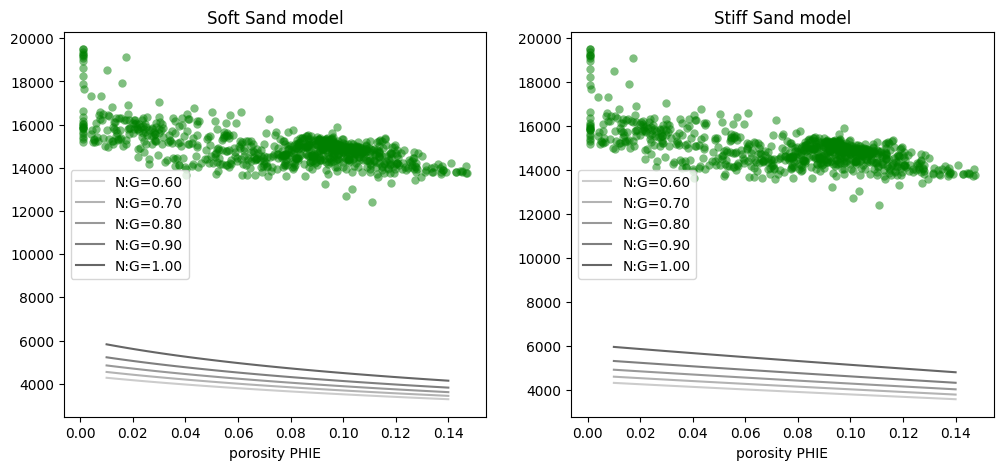

In [25]:
NG=np.linspace(0.6, 1.0, 5)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

for i in NG:
    _,_,K0 = vrh(i,K_qz,K_sh)
    _,_,MU0 = vrh(i,MU_qz,MU_sh)
    RHO0 = i*RHO_qz+(1-i)*RHO_sh
    Kdry, MUdry = softsand(K0, MU0, phi, phic=.5, Cn=12, P=45)
    vp_ssm,vs_ssm,rho_ssm,_= vels(Kdry,MUdry,K0,RHO0,K_b,RHO_b,phi)
    Kdry, MUdry = stiffsand(K0, MU0, phi, phic=.4, Cn=8, P=45)
    vp_sti,vs_sti,rho_sti,_= vels(Kdry,MUdry,K0,RHO0,K_b,RHO_b,phi)
    ax[0].plot(phi, vp_ssm, '-k', label='N:G={:.2f}'.format(i),alpha=i-.4)
    ax[1].plot(phi, vp_sti, '-k', label='N:G={:.2f}'.format(i),alpha=i-.4)

for aa in ax:
    aa.plot(L.PHIE[ss], L.VP[ss], **sty1, label='')
    aa.legend(loc='best')

ax[0].set_title('Soft Sand model')
ax[0].set_xlabel('porosity PHIE')

ax[1].set_title('Stiff Sand model')
ax[1].set_xlabel('porosity PHIE')

plt.show()

In [26]:
phi_test = np.array([0.2,0.3])

Kdry, MUdry = softsand(K0, MU0, phi_test, phic=.5, Cn=12, P=45)
vp_ssm,_,_,_= vels(Kdry,MUdry,K0,RHO0,K_b,RHO_b,phi_test)

Kdry, MUdry = stiffsand(K0, MU0, phi_test, phic=.4, Cn=8, P=45)
vp_sti,_,_,_ = vels(Kdry,MUdry,K0,RHO0,K_b,RHO_b,phi_test)

print('Soft Sand RPM: phi={:.2f} --> Vp={:.0f} m/s'.format(phi_test[0],vp_ssm[0]))
print('Soft Sand RPM: phi={:.2f} --> Vp={:.0f} m/s'.format(phi_test[1],vp_ssm[1]))
print('Soft Sand RPM: increase in Vp after 10% porosity decrease={:.0%}'.format((vp_ssm[0]-vp_ssm[1])/vp_ssm[1]))

print('Stiff Sand RPM: phi={:.2f} --> Vp={:.0f} m/s'.format(phi_test[0],vp_sti[0]))
print('Stiff Sand RPM: phi={:.2f} --> Vp={:.0f} m/s'.format(phi_test[1],vp_sti[1]))
print('Stiff Sand RPM: increase in Vp after 10% porosity decrease={:.0%}'.format((vp_sti[0]-vp_sti[1])/vp_sti[1]))

Soft Sand RPM: phi=0.20 --> Vp=3733 m/s
Soft Sand RPM: phi=0.30 --> Vp=3245 m/s
Soft Sand RPM: increase in Vp after 10% porosity decrease=15%
Stiff Sand RPM: phi=0.20 --> Vp=4320 m/s
Stiff Sand RPM: phi=0.30 --> Vp=3477 m/s
Stiff Sand RPM: increase in Vp after 10% porosity decrease=24%


In [27]:
def rpt(model='soft',vsh=0.0,fluid='gas',phic=0.4,Cn=8,P=10,f=1,display=True):
    phi=np.linspace(0.01,phic,10)
    sw=np.linspace(0,1,10)
    xx=np.empty((phi.size,sw.size))
    yy=np.empty((phi.size,sw.size))
    (K_hc, RHO_hc) = (K_g, RHO_g) if fluid == 'gas' else (K_o, RHO_o)

    _,_,K0 = vrh(vsh,K_sh,K_qz)
    _,_,MU0 = vrh(vsh,MU_sh,MU_qz)
    RHO0 = vsh*RHO_sh+(1-vsh)*RHO_qz
    if model=='soft':
        Kdry, MUdry = softsand(K0,MU0,phi,phic,Cn,P,f)
    elif model=='stiff':
        Kdry, MUdry = stiffsand(K0,MU0,phi,phic,Cn,P,f)

    for i,val in enumerate(sw):
        _,K_f,_= vrh(val,K_b,K_hc)
        RHO_f = val*RHO_b + (1-val)*RHO_hc
        vp,vs,rho,_= vels(Kdry,MUdry,K0,RHO0,K_f,RHO_f,phi)
        xx[:,i]=vp*rho
        yy[:,i]=vp/vs
    opt1={'backgroundcolor':'0.9'}
    opt2={'ha':'right','backgroundcolor':'0.9'}

    if display:
        plt.figure(figsize=(7,7))
        plt.plot(xx, yy, '-ok', alpha=0.3)
        plt.plot(xx.T, yy.T, '-ok', alpha=0.3)
        for i,val in enumerate(phi):
            plt.text(xx[i,-1]+150,yy[i,-1]+.02,'$\phi={:.02f}$'.format(val), **opt1)
        plt.text(xx[-1,0]-200,yy[-1,0]-0.015,'$S_\mathrm{{w}}={:.02f}$'.format(sw[0]), **opt2)
        plt.text(xx[-1,-1]-200,yy[-1,-1]-0.015,'$S_\mathrm{{w}}={:.02f}$'.format(sw[-1]), **opt2)
        plt.xlabel('IP'), plt.ylabel('VP/VS')

        plt.title('RPT {} (N:G={}, fluid={})'.format(model.upper(),1-vsh, fluid))

        plt.show()
    return xx,yy

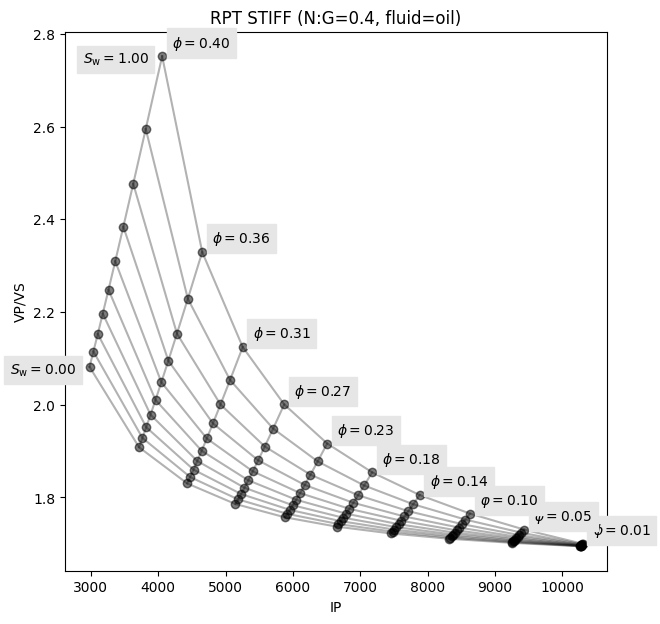

In [28]:
ip_rpt1, vpvs_rpt1 = rpt(model='stiff',vsh=0.6,fluid='oil',phic=0.4,Cn=8,P=45,f=.3)

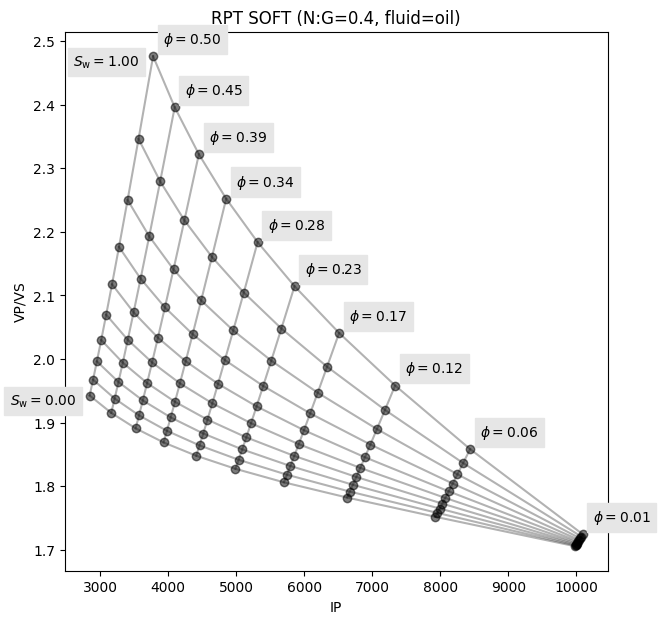

In [29]:
ip_rpt0, vpvs_rpt0 = rpt(model='soft',vsh=0.6,fluid='oil',phic=0.5,Cn=12,P=45,f=.3)

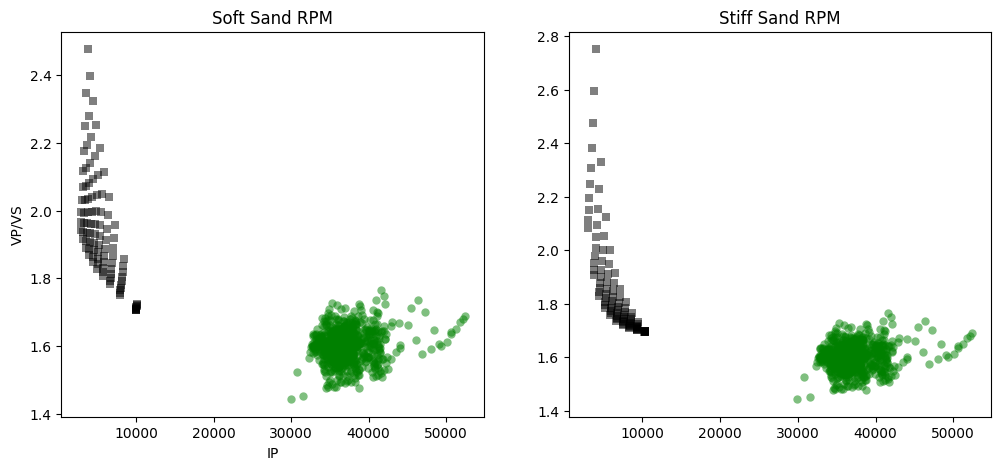

In [30]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax[0].plot(ip_rpt0, vpvs_rpt0, 'sk', mew=0, alpha=0.5)
ax[1].plot(ip_rpt1, vpvs_rpt1, 'sk', mew=0, alpha=0.5)
for aa in ax:
    aa.plot(L.VP[ss]*L.RHO[ss], L.VP[ss]/L.VS[ss], **sty1)
ax[0].set_title('Soft Sand RPM')
ax[1].set_title('Stiff Sand RPM')

ax[0].set_xlabel('IP')
ax[0].set_ylabel('VP/VS')

plt.show()

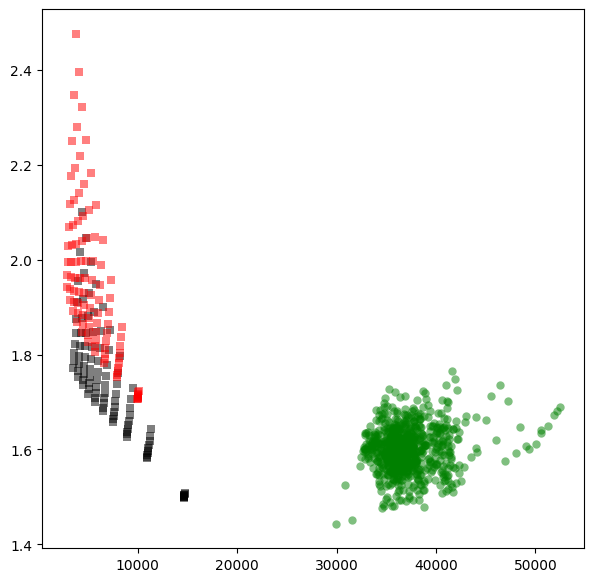

In [31]:
# Original parameters.
RHO_sh=2.8;   K_sh=15;  MU_sh=5

ip_rpt0a, vpvs_rpt0a = rpt(model='soft',vsh=0.0,fluid='oil',phic=0.5,Cn=12,P=45,f=.3,display=False)
ip_rpt0b, vpvs_rpt0b = rpt(model='soft',vsh=0.6,fluid='oil',phic=0.5,Cn=12,P=45,f=.3,display=False)

f, ax = plt.subplots(figsize=(7,7))
ax.plot(ip_rpt0a, vpvs_rpt0a, 'sk', mew=0, alpha=0.5)
ax.plot(ip_rpt0b, vpvs_rpt0b, 'sr', mew=0, alpha=0.5)
ax.plot(L.VP[ss]*L.RHO[ss], L.VP[ss]/L.VS[ss], **sty1)

plt.show()

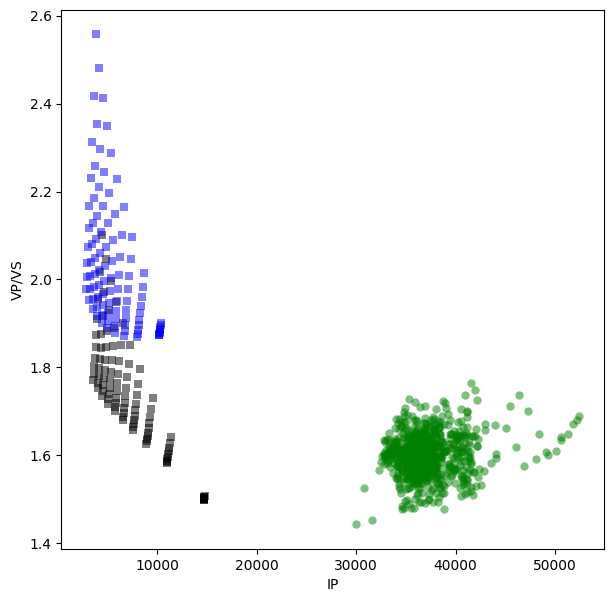

In [32]:
# New parameters.
RHO_sh=2.8;   K_sh=21;  MU_sh=3

ip_rpt0a, vpvs_rpt0a = rpt(model='soft',vsh=0.0,fluid='oil',phic=0.5,Cn=12,P=45,f=.3,display=False)
ip_rpt0b, vpvs_rpt0b = rpt(model='soft',vsh=0.6,fluid='oil',phic=0.5,Cn=12,P=45,f=.3,display=False)

f, ax = plt.subplots(figsize=(7,7))
ax.plot(ip_rpt0a, vpvs_rpt0a, 'sk', mew=0, alpha=0.5)
ax.plot(ip_rpt0b, vpvs_rpt0b, 'sb', mew=0, alpha=0.5)
ax.plot(L.VP[ss]*L.RHO[ss], L.VP[ss]/L.VS[ss], **sty1)

ax.set_xlabel('IP')
ax.set_ylabel('VP/VS')

plt.show()

In [33]:
def twolayer(vp0,vs0,rho0,vp1,vs1,rho1):
  try:
    from bruges.reflection import shuey2
    from bruges.filters import ricker
  except:
    %pip install bruges
    from bruges.reflection import shuey2
    from bruges.filters import ricker

  n_samples = 500
  interface=int(n_samples/2)
  ang=np.arange(31)
  wavelet=ricker(.25, 0.001, 25)

  model_ip,model_vpvs,rc0,rc1 = ( np.zeros(n_samples) for _ in range(4) )
  model_z = np.arange(n_samples)
  model_ip[:interface]=vp0*rho0
  model_ip[interface:]=vp1*rho1
  model_vpvs[:interface]=np.true_divide(vp0,vs0)
  model_vpvs[interface:]=np.true_divide(vp1,vs1)

  avo=shuey2(vp0,vs0,rho0,vp1,vs1,rho1,ang)
  rc0[interface]=avo[0]
  rc1[interface]=avo[-1]
  synt0=np.convolve(rc0,wavelet,mode='same')
  synt1=np.convolve(rc1,wavelet,mode='same')
  clip=np.max(np.abs([synt0, synt1]))
  clip += clip*.2

  opz0={'color':'b', 'linewidth':4}
  opz1={'color':'k', 'linewidth':2}
  opz2={'linewidth':0, 'alpha':0.5}

  f = plt.subplots(figsize=(10, 4))
  ax0 = plt.subplot2grid((1,16), (0,0), colspan=2) # ip
  ax1 = plt.subplot2grid((1,16), (0,2), colspan=2) # vp/vs
  ax2 = plt.subplot2grid((1,16), (0,4), colspan=2) # synthetic @ 0 deg
  ax3 = plt.subplot2grid((1,16), (0,6), colspan=2) # synthetic @ 30 deg
  ax4 = plt.subplot2grid((1,16), (0,9), colspan=7) # avo curve

  ax0.plot(model_ip, model_z, **opz0)
  ax0.set_xlabel('IP')
  ax0.locator_params(axis='x', nbins=2)

  ax1.plot(model_vpvs, model_z, **opz0)
  ax1.set_xlabel('VP/VS')
  ax1.locator_params(axis='x', nbins=2)

  ax2.plot(synt0, model_z, **opz1)
  ax2.fill_betweenx(model_z, 0, synt0, where=synt0>0, facecolor='black', **opz2)
  ax2.set_xlim(-clip,clip)
  ax2.set_xlabel('angle={:.0f}'.format(ang[0]))
  ax2.locator_params(axis='x', nbins=2)

  ax3.plot(synt1, model_z, **opz1)
  ax3.fill_betweenx(model_z, 0, synt1, where=synt1>0, facecolor='black', **opz2)
  ax3.set_xlim(-clip,clip)
  ax3.set_xlabel('angle={:.0f}'.format(ang[-1]))
  ax3.locator_params(axis='x', nbins=2)

  ax4.plot(ang, avo, **opz0)
  ax4.axhline(0, color='k', lw=2)
  ax4.set_xlabel('angle of incidence')
  ax4.tick_params(which='major', labelsize=8)

  for aa in [ax0,ax1,ax2,ax3]:
      aa.set_ylim(350,150)
      aa.tick_params(which='major', labelsize=8)
      aa.set_yticklabels([])

  plt.subplots_adjust(wspace=.8,left=0.05,right=0.95)

In [34]:
top=2175
z0=top-40
z1=top
z2=top+40
z=L.index
ss = (z>=z1) & (z<=z2)
sh = (z>=z0) & (z<=z1)

vp0, vs0, rho0 = L[['VP','VS','RHO']][sh].mean().values
vp1, vs1, rho1 = L[['VP','VS','RHO']][ss].mean().values
samples_sh=np.isfinite(L.index[sh]).size
samples_ss=np.isfinite(L.index[ss]).size

print('({:>4.0f}-{:<4.0f}m,{:3d} samples) Vp={:.0f}, Vs={:.0f}, rho={:.2f}, Ip={:.0f}, Vp/Vs={:.2f} '.format(z0,z1,samples_sh,vp0,vs0,rho0,vp0*rho0,vp0/vs0))
print('({:>4.0f}-{:<4.0f}m,{:3d} samples) Vp={:.0f}, Vs={:.0f}, rho={:.2f}, Ip={:.0f}, Vp/Vs={:.2f} '.format(z1,z2,samples_ss,vp1,vs1,rho1,vp1*rho1,vp1/vs1))

(2135-2175m,  0 samples) Vp=nan, Vs=nan, rho=nan, Ip=nan, Vp/Vs=nan 
(2175-2215m,  0 samples) Vp=nan, Vs=nan, rho=nan, Ip=nan, Vp/Vs=nan 


In [35]:
twolayer(vp0, vs0, rho0, vp1, vs1, rho1)

  Using cached bruges-0.5.4-py3-none-any.whl (94 kB)
Note: you may need to restart the kernel to use updated packages.


ValueError: object too deep for desired array

In [ ]:
RHO_qz=2.65;   K_qz=37;  MU_qz=15
RHO_sh=2.8;   K_sh=15;  MU_sh=5

phi,nn=.15,.9
_,_,K0 = vrh(nn,K_qz,K_sh)
_,_,MU0 = vrh(nn,MU_qz,MU_sh)
RHO0 = nn*RHO_qz+(1-nn)*RHO_sh

Kdry, MUdry = softsand(K0, MU0, phi, phic=.5, Cn=12, P=45,f=.3)
vp_rpm,vs_rpm,rho_rpm,_= vels(Kdry,MUdry,K0,RHO0,K_g,RHO_g,phi)

twolayer(vp0, vs0, rho0, vp_rpm, vs_rpm, rho_rpm)
#plt.title('GAS case, phi=0.15')

plt.show()

In [ ]:
phi,nn=.25,.9
_,_,K0 = vrh(nn,K_qz,K_sh)
_,_,MU0 = vrh(nn,MU_qz,MU_sh)
RHO0 = nn*RHO_qz+(1-nn)*RHO_sh

Kdry, MUdry = softsand(K0, MU0, phi, phic=.5, Cn=12, P=45,f=.3)
vp_rpm,vs_rpm,rho_rpm,_= vels(Kdry,MUdry,K0,RHO0,K_g,RHO_g,phi)

twolayer(vp0,vs0,rho0,vp_rpm,vs_rpm,rho_rpm)
plt.title('GAS case, phi=0.25')